# EDA (Exploratory Data Analysis)

## Objectives
* Validate the realism of the simulated dataset (distributions, correlations, etc.)
* Understand feature relationships that might influence core body temperature (CBT)
* Identify any data issues (outliers, noise, missing values, bimodality, unrealistic trends)
* Prepare for modeling (feature selection, normalization, binning thresholds

## Datasets
* Main Dataset: dogs_dataset.csv
  * Compiled data that models will train on
  * Check distributions (temperature, humidity, etc.)
  * Validate realism (against literature cutoffs)
  * Identify correlations with the target (core_temp)
  * Detect bimodality or skew in features
  * Regression Prep
* Detail Dataset: breed_traits_long.csv
  * correlates: breed → traits (activity, coat, heat sensitivity)
  * Check category consistency
  * Check duplicates
  * Check missing breed
  * Check realistic distributions of activity level vs. coat type
* Detail Dataset: breed_rank.csv
  * Popularity frequency data
  * Confirm top breeds match AKC distributions (sanity check)
* Detail Dataset: trait_description.csv
  * Text descriptions of traits
  * Optionally use NLP summarization or manual verification that numeric encodings match text descriptions

In [1]:
'''Import Libraries '''
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

## Step 1: Inspect Dataset(s)

In [2]:
'''Load Simulated Dataset'''
df = pd.read_csv("dogs_dataset.csv") # read the dataset for dog breeds
breed_traits = pd.read_csv("breed_traits.csv") # read the dataset for breed traits
breed_traits_long = pd.read_csv("breed_traits_long.csv") # read the dataset for long format of breed traits
breed_rank = pd.read_csv("breed_rank.csv") # read the dataset for breed rankings
trait_desc = pd.read_csv("trait_description.csv") # read the dataset for trait descriptions

'''Get Dataset Overview'''
print(f"Dogs: \nRows: {df.shape[0]}, Columns: {df.shape[1]}\n\n") # print the number of rows and columns
print(f"Breed Traits: \nRows: {breed_traits.shape[0]}, Columns: {breed_traits.shape[1]}\n\n")
print(f"Breed Traits Long: \nRows: {breed_traits_long.shape[0]}, Columns: {breed_traits_long.shape[1]}\n\n")
print(f"Breed Rank: \nRows: {breed_rank.shape[0]}, Columns: {breed_rank.shape[1]}\n\n")
print(f"Trait Description: \nRows: {trait_desc.shape[0]}, Columns: {trait_desc.shape[1]}\n\n")
df.head()



Dogs: 
Rows: 3000, Columns: 5


Breed Traits: 
Rows: 195, Columns: 17


Breed Traits Long: 
Rows: 3120, Columns: 3


Breed Rank: 
Rows: 195, Columns: 11


Trait Description: 
Rows: 16, Columns: 4




,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male


## Step 2: Summary Statistics & Data Quality Checks

### What We're Checking
* **Missing Values Analysis**
  * Per-column missing counts and percentages across all datasets
  * Visual heatmaps of missing patterns (for large tables)
  * Cross-dataset validation (breeds in main dataset vs. traits table)
  * Duplicate detection in join keys
* **Data Types & Structure**
  * Column dtypes, non-null counts, and unique value counts
  * High-cardinality detection (columns with many unique values)
  * Categorical vs. numerical feature identification
* **Distribution Analysis**
  * Standard statistical summaries (mean, std, min, max, quartiles)
  * Top categories with counts and percentages
  * Visual distributions (histograms, KDE) for key features
* **Outlier Detection & Realism Checks**
  * **Age**: Realistic Range: 7 months (0.58 years) - 25 years (Source 1)
  * **Weight Cutoffs**:
    * Heat Risk Starts At: ≥ 15 kg (Source 2)
    * Medium Breed Dogs: 1.8 kg - 45.4 kg, Mean: 17 kg (Source 1)
    * Large Breed Dogs: Mean: 31.4 ± 4.6 kg (Sources 2 & 3)

### Key Outputs
1. Enhanced summary table (dtype, missing %, unique counts) sorted by data quality issues
2. Standard `describe()` statistics for all columns
3. Top-20 values with percentages for categorical features (Breed, Color, Gender)
4. Visual distributions and balance checks for demographics
5. Cross-dataset validation results

In [3]:
print("\n\nSummary Statistics:") # print summary statistics header
df.describe(include='all').T # get summary statistics of the dataset



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Breed,3000,53,Rottweiler,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age (Years),3000.0,NaN,NaN,NaN,7.499,4.011238,1.0,4.0,8.0,11.0,14.0
Weight (kg),3000.0,NaN,NaN,NaN,32.059667,15.628463,5.0,19.0,33.0,45.0,59.0
Color,3000,16,Black and White,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,3000,2,Female,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN



dogs_dataset — rows: 3000, cols: 5
  No missing values found ✅

breed_traits — rows: 195, cols: 17
  No missing values found ✅

breed_traits_long — rows: 3120, cols: 3
  No missing values found ✅

breed_rank — rows: 195, cols: 11


,missing_count,missing_pct
2019 Rank,20,10.26
2013 Rank,19,9.74
2014 Rank,19,9.74
2015 Rank,19,9.74
2016 Rank,19,9.74
2017 Rank,19,9.74
2018 Rank,19,9.74



trait_description — rows: 16, cols: 4
  No missing values found ✅


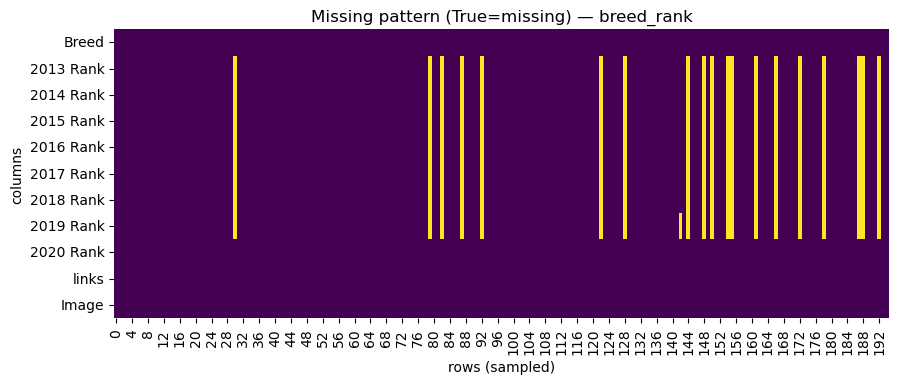

Breeds in dogs_dataset missing from breed_traits (count): 50
['Airedale Terrier', 'Akita', 'Alaskan Malamute', 'Australian Shepherd', 'Basenji', 'Beagle', 'Belgian Malinois', 'Bernese Mountain Dog', 'Bichon Frise', 'Bloodhound', 'Border Collie', 'Boston Terrier', 'Boxer', 'Bull Terrier', 'Bulldog', 'Cavalier King Charles Spaniel', 'Chesapeake Bay Retriever', 'Chihuahua', 'Chinese Shar-Pei', 'Cocker Spaniel']
Duplicate Breed rows in breed_traits: 0


In [4]:
# Check missing values across all loaded datasets
datasets = {
    "dogs_dataset": df,
    "breed_traits": breed_traits,
    "breed_traits_long": breed_traits_long,
    "breed_rank": breed_rank,
    "trait_description": trait_desc
}

def missing_summary(df):
    n = len(df)
    missing_count = df.isnull().sum()
    missing_pct = (missing_count / n * 100).round(2)
    summary = pd.concat([missing_count, missing_pct], axis=1)
    summary.columns = ["missing_count", "missing_pct"]
    return summary[summary["missing_count"] > 0].sort_values("missing_count", ascending=False)

for name, table in datasets.items():
    print(f"\n{name} — rows: {len(table)}, cols: {table.shape[1]}")
    ms = missing_summary(table)
    if ms.empty:
        print("  No missing values found ✅")
    else:
        display(ms)

import seaborn as sns
import matplotlib.pyplot as plt

# small heatmap sample for large tables
for name, table in datasets.items():
    if len(table) > 1000:
        sample = table.sample(1000, random_state=0)
    else:
        sample = table
    if sample.isnull().values.any():
        plt.figure(figsize=(10, 1 + 0.25 * sample.shape[1]))
        sns.heatmap(sample.isnull().T, cbar=False, cmap="viridis")
        plt.title(f"Missing pattern (True=missing) — {name}")
        plt.xlabel("rows (sampled)")
        plt.ylabel("columns")
        plt.show()
    
# Are breeds in dogs_dataset represented in breed_traits?
breeds_not_in_traits = set(df["Breed"].unique()) - set(breed_traits["Breed"].unique())
print("Breeds in dogs_dataset missing from breed_traits (count):", len(breeds_not_in_traits))
if breeds_not_in_traits:
    print(sorted(list(breeds_not_in_traits))[:20])  # show up to 20 examples

# Check for duplicate keys in breed_traits if Breed is expected unique
dups = breed_traits["Breed"].duplicated().sum()
print("Duplicate Breed rows in breed_traits:", dups)

### Popularity rank consolidation — feature creation and imputation
What we do:
- Create robust popularity features from `breed_rank` despite scattered missing years.
- Use the most recent non-null rank across years (recency-first fallback).
- Compute the mean rank across available years (skip missing).
- Report coverage and missingness for these derived features.

Outputs:
- `rank_recent` (most recent available rank per breed)
- `rank_mean` (mean rank across available years)
- Coverage summary and quick sanity checks

rank_cols used: ['2013 Rank', '2014 Rank', '2015 Rank', '2016 Rank', '2017 Rank', '2018 Rank', '2019 Rank', '2020 Rank']
Feature coverage (non-null counts):
rank_recent    195
rank_mean      195
dtype: int64


,Breed,rank_recent,rank_mean,rank_missing_share
0,Retrievers (Labrador),1.0,1.000,0.0
1,French Bulldogs,2.0,5.750,0.0
2,German Shepherd Dogs,3.0,2.125,0.0
3,Retrievers (Golden),4.0,3.125,0.0
4,Bulldogs,5.0,4.625,0.0
5,Poodles,6.0,7.000,0.0
6,Beagles,7.0,5.625,0.0
7,Rottweilers,8.0,8.500,0.0
8,Pointers (German Shorthaired),9.0,10.500,0.0
9,Dachshunds,10.0,11.625,0.0


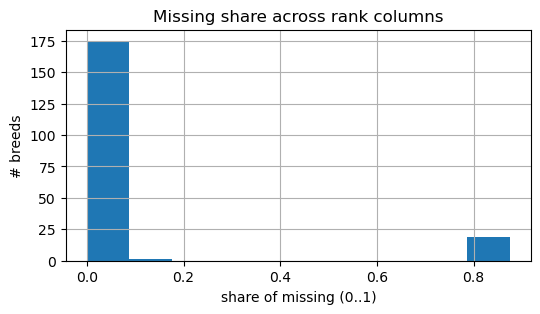

In [5]:
# Build robust popularity features from breed_rank
rank_cols = [c for c in breed_rank.columns if isinstance(c, str) and c.endswith(" Rank") and c.split()[0].isdigit()]
if not rank_cols:
    print("No year-based rank columns found in breed_rank.")
else:
    # Sort by year descending for recency-first fallback
    def year_from_col(c):
        try:
            return int(c.split()[0])
        except Exception:
            return -1
    rank_cols_sorted_desc = sorted(rank_cols, key=year_from_col, reverse=True)
    rank_cols_sorted_asc = list(reversed(rank_cols_sorted_desc))
    
    # Most recent non-null rank per row: bfill across columns sorted desc, take first column
    recent = breed_rank[rank_cols_sorted_desc].bfill(axis=1).iloc[:, 0]
    # Mean rank across available years
    mean_rank = breed_rank[rank_cols].mean(axis=1, skipna=True)
    # Missingness share across rank columns
    miss_share = breed_rank[rank_cols].isnull().mean(axis=1).round(3)
    
    breed_rank_features = breed_rank[["Breed"]].copy()
    breed_rank_features["rank_recent"] = recent
    breed_rank_features["rank_mean"] = mean_rank
    breed_rank_features["rank_missing_share"] = miss_share
    
    print("rank_cols used:", rank_cols_sorted_asc)
    print("Feature coverage (non-null counts):")
    print(breed_rank_features[["rank_recent","rank_mean"]].notnull().sum())
    display(breed_rank_features.head(10))
    
    # Optional: quick hist of rank_missing_share
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(6,3))
        breed_rank_features["rank_missing_share"].hist(bins=10)
        plt.title("Missing share across rank columns")
        plt.xlabel("share of missing (0..1)")
        plt.ylabel("# breeds")
        plt.show()
    except Exception as e:
        print("Histogram skipped:", e)

### Integrate popularity rank into main dataset — token-normalized join
What we do:
- Normalize breed names to token-keys (lowercase, punctuation removed, simple singularization, stopword removal).
- Join `rank_recent`, `rank_mean`, and `rank_missing_share` from AKC ranks into the main dataset.
- Report coverage (share of rows matched) and list a few unmatched breed examples.

Outputs:
- Main `df` enriched with rank features
- Match coverage summary and unmatched sample list

In [6]:
# Join rank features into main df using a token-normalized breed key
import re
def breed_key(s):
    if not isinstance(s, str):
        return None
    s = s.lower()
    s = re.sub(r"[()\-/&,]", " ", s)
    s = re.sub(r"[^a-z\s]", "", s)
    tokens = [t for t in s.split() if t not in {"dog", "dogs"}]
    def singularize(t):
        if t.endswith("ies"):
            return t[:-3] + "y"
        if t.endswith("s") and not t.endswith("ss"):
            return t[:-1]
        return t
    tokens = [singularize(t) for t in tokens]
    tokens = sorted(set(tokens))
    return " ".join(tokens)

# Build keys
if "Breed" in df.columns:
    df["breed_key"] = df["Breed"].apply(breed_key)
else:
    raise KeyError("'Breed' column not found in main df for rank merge.")

brf = breed_rank_features.copy() if 'breed_rank_features' in locals() else None
if brf is None:
    raise ValueError("breed_rank_features not available; run the rank consolidation cell first.")
brf["breed_key"] = brf["Breed"].apply(breed_key)

# Merge
pre = df.shape
df = df.merge(brf[["breed_key","rank_recent","rank_mean","rank_missing_share"]], on="breed_key", how="left")
post = df.shape
print(f"Merged AKC ranks into df: {pre} -> {post}")

# Coverage
coverage = df["rank_recent"].notnull().mean() * 100
print(f"Rank coverage in df (rows matched): {coverage:.2f}%")

# Show unmatched sample
if coverage < 100:
    missing_breeds = df.loc[df["rank_recent"].isnull(), "Breed"].dropna().unique()[:25]
    if len(missing_breeds):
        print("Unmatched breeds (sample up to 25):\n", sorted(missing_breeds))

display(df.head())

Merged AKC ranks into df: (3000, 6) -> (3000, 9)
Rank coverage in df (rows matched): 92.97%
Unmatched breeds (sample up to 25):
 ['Border Collie', 'Jack Russell Terrier', 'Saint Bernard', 'Schnauzer']


,Breed,Age (Years),Weight (kg),Color,Gender,breed_key,rank_recent,rank_mean,rank_missing_share
0,Airedale Terrier,13,35,White,Male,airedale terrier,62.0,57.375,0.000
1,Jack Russell Terrier,10,43,Tan,Female,jack russell terrier,NaN,NaN,NaN
2,Dogo Argentino,2,16,Spotted,Female,argentino dogo,93.0,93.000,0.875
3,Labrador Retriever,9,57,Bicolor,Male,labrador retriever,1.0,1.000,0.000
4,French Bulldog,12,39,Spotted,Male,bulldog french,2.0,5.750,0.000


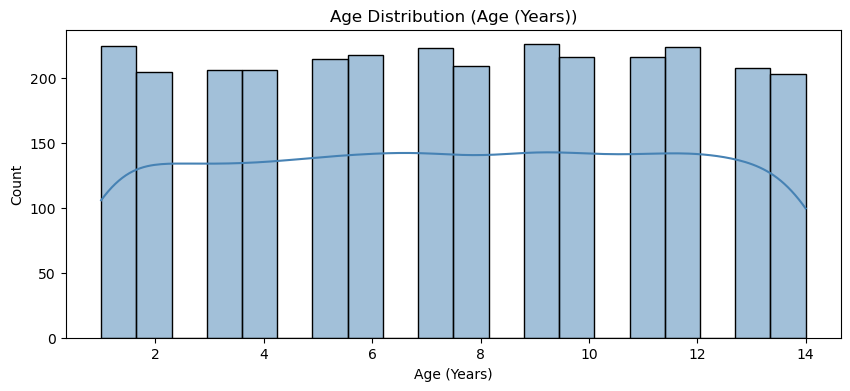

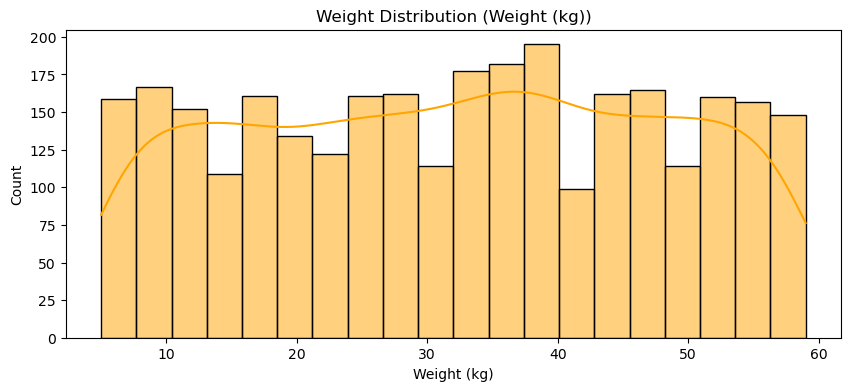

/var/folders/34/vzwf82z17w56m8n_7h6wclc80000gn/T/ipykernel_87759/4101125308.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_breeds.index, x=top_breeds.values, palette="viridis")


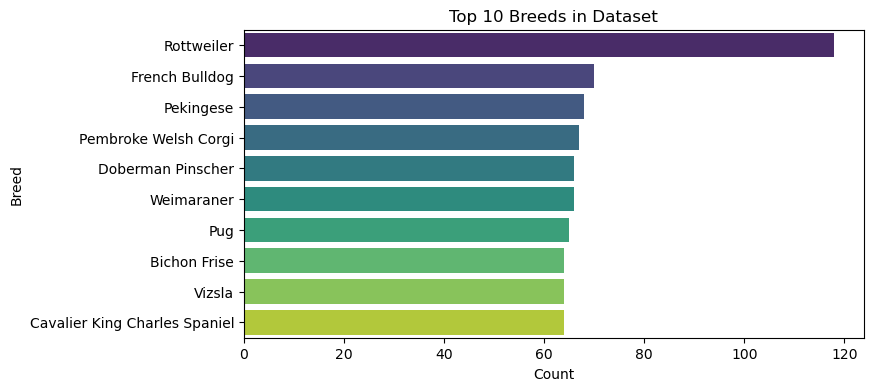

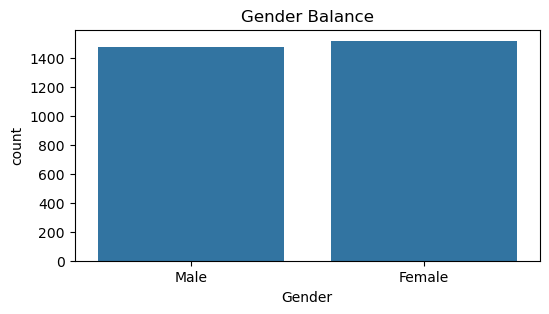

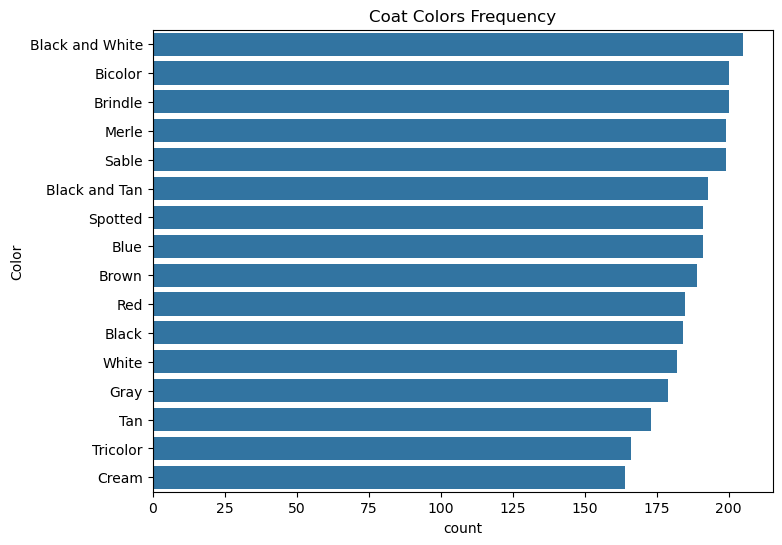

In [7]:
# Helper to test presence of a column and provide readable name
def has_col(df, col_names):
    for c in col_names:
        if c in df.columns:
            return c
    return None

# Age distribution
age_col = has_col(df, ["Age (Years)", "Age (years)", "Age"])
if age_col:
    plt.figure(figsize=(10,4))
    sns.histplot(df[age_col].dropna(), bins=20, kde=True, color="steelblue")
    plt.title(f"Age Distribution ({age_col})")
    plt.xlabel(age_col)
    plt.show()
else:
    print("Age column not found; skipping age distribution.")

# Weight distribution
weight_col = has_col(df, ["Weight (kg)", "Weight (Kg)", "Weight"])
if weight_col:
    plt.figure(figsize=(10,4))
    sns.histplot(df[weight_col].dropna(), bins=20, kde=True, color="orange")
    plt.title(f"Weight Distribution ({weight_col})")
    plt.xlabel(weight_col)
    plt.show()
else:
    print("Weight column not found; skipping weight distribution.")

# Top breeds
if "Breed" in df.columns:
    top_breeds = df["Breed"].value_counts().head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(y=top_breeds.index, x=top_breeds.values, palette="viridis")
    plt.title("Top 10 Breeds in Dataset")
    plt.xlabel("Count")
    plt.ylabel("Breed")
    plt.show()
else:
    print("Breed column not found; skipping top-breeds plot.")

# Gender balance
if "Gender" in df.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x="Gender", data=df)
    plt.title("Gender Balance")
    plt.show()
else:
    print("Gender column not found; skipping gender balance plot.")

# Coat colors
if "Color" in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(y="Color", data=df, order=df["Color"].value_counts().index)
    plt.title("Coat Colors Frequency")
    plt.show()
else:
    print("Color column not found; skipping coat colors plot.")

In [8]:
# Improved summary: dtype, non-null count, unique, missing count and %
def improved_summary(df):
    n = len(df)
    dtype = df.dtypes
    non_null = df.count()
    unique = df.nunique(dropna=True)
    missing = df.isnull().sum()
    missing_pct = (missing / n * 100).round(2)
    summary = pd.concat([
        dtype.rename('dtype'), 
        non_null.rename('non_null'), 
        unique.rename('n_unique'), 
        missing.rename('missing_count'), 
        missing_pct.rename('missing_%')
    ], axis=1)
    # Sort by missing_count desc, then by n_unique for readability
    return summary.sort_values(['missing_count', 'n_unique'], ascending=[False, True])

print("=== Enhanced Summary Statistics ===\n")
display(improved_summary(df))

print("\n=== Standard describe() output ===")
display(df.describe(include='all').T)

# Top categories with counts AND percentages
def top_vals_with_pct(series, top_n=20):
    vc = series.value_counts(dropna=False)
    pct = (vc / len(series) * 100).round(2)
    out = pd.concat([vc.rename('count'), pct.rename('%')], axis=1)
    return out.head(top_n)

print("\n=== Top Categories (with percentages) ===")
for c in ["Breed", "Color", "Gender"]:
    if c in df.columns:
        print(f"\nTop 20 values for '{c}':")
        display(top_vals_with_pct(df[c], top_n=20))
    else:
        print(f"\nColumn '{c}' not found; skipping.")


=== Enhanced Summary Statistics ===



,dtype,non_null,n_unique,missing_count,missing_%
rank_missing_share,float64,2789,2,211,7.03
rank_mean,float64,2789,44,211,7.03
rank_recent,float64,2789,49,211,7.03
Gender,object,3000,2,0,0.00
Age (Years),int64,3000,14,0,0.00
Color,object,3000,16,0,0.00
Breed,object,3000,53,0,0.00
breed_key,object,3000,53,0,0.00
Weight (kg),int64,3000,55,0,0.00



=== Standard describe() output ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Breed,3000,53,Rottweiler,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age (Years),3000.0,NaN,NaN,NaN,7.499,4.011238,1.0,4.0,8.0,11.0,14.0
Weight (kg),3000.0,NaN,NaN,NaN,32.059667,15.628463,5.0,19.0,33.0,45.0,59.0
Color,3000,16,Black and White,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,3000,2,Female,1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breed_key,3000,53,rottweiler,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rank_recent,2789.0,NaN,NaN,NaN,33.809968,25.421746,1.0,13.0,27.0,50.0,95.0
rank_mean,2789.0,NaN,NaN,NaN,33.041682,24.329722,1.0,13.5,26.5,49.375,93.0
rank_missing_share,2789.0,NaN,NaN,NaN,0.017255,0.12168,0.0,0.0,0.0,0.0,0.875



=== Top Categories (with percentages) ===

Top 20 values for 'Breed':


,count,%
Breed,,
Rottweiler,118,3.93
French Bulldog,70,2.33
Pekingese,68,2.27
Pembroke Welsh Corgi,67,2.23
Doberman Pinscher,66,2.20
Weimaraner,66,2.20
Pug,65,2.17
Bichon Frise,64,2.13
Vizsla,64,2.13



Top 20 values for 'Color':


,count,%
Color,,
Black and White,205,6.83
Bicolor,200,6.67
Brindle,200,6.67
Merle,199,6.63
Sable,199,6.63
Black and Tan,193,6.43
Spotted,191,6.37
Blue,191,6.37
Brown,189,6.30



Top 20 values for 'Gender':


,count,%
Gender,,
Female,1520,50.67
Male,1480,49.33


## Step 3: Univariate numeric distributions — histograms and box plots

What we do:
- Plot histograms and box plots for key numeric features (e.g., Age (Years), Weight (kg))
- Assess range, skewness, and outliers for each feature
- Auto-skip features that are missing or entirely null

Outputs:
- Histogram per numeric feature (distribution shape)
- Horizontal box plot per numeric feature (outlier visualization)

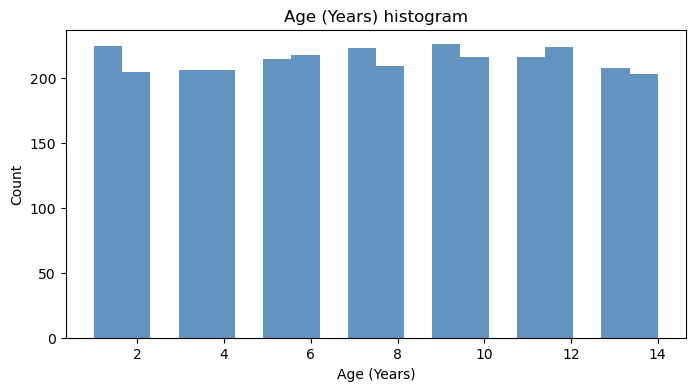

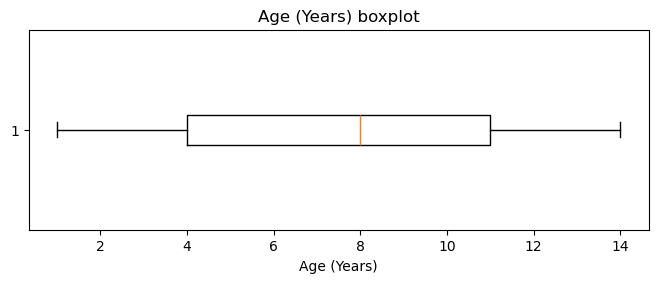

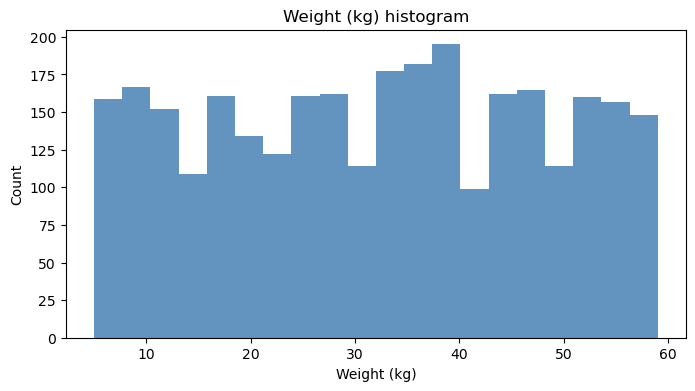

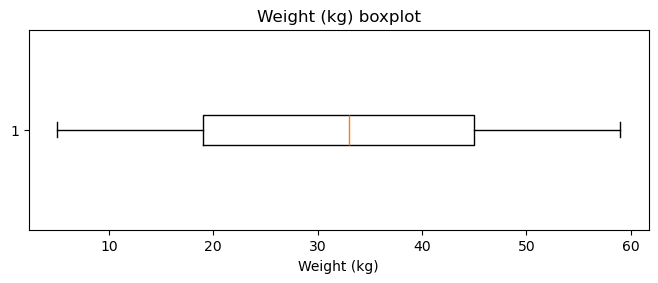

In [9]:
# Plot histograms and box plots for available target numeric columns
candidates = ["Age (Years)", "Weight (kg)"]
num_cols = [c for c in candidates if c in df.columns]

if not num_cols:
    print("No target numeric columns found among:", candidates)
else:
    for col in num_cols:
        series = df[col].dropna()
        if series.empty:
            print(f"Column '{col}' has no non-null values; skipping.")
            continue
        plt.figure(figsize=(8,4))
        plt.hist(series, bins=20, color="steelblue", alpha=0.85)
        plt.title(f"{col} histogram")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

        plt.figure(figsize=(8,2.6))
        plt.boxplot(series, vert=False)
        plt.title(f"{col} boxplot")
        plt.xlabel(col)
        plt.show()

## Step 4: Correlations and scatter — numeric relationships

What we do:
- Compute a correlation matrix across all numeric columns and render a heatmap
- Visualize Age vs. Weight as a scatter plot; color by Gender when available
- Guard for insufficient numeric features to avoid errors

Outputs:
- Numeric correlation heatmap (coolwarm scale)
- Scatter plot for Age vs. Weight with legend if Gender exists

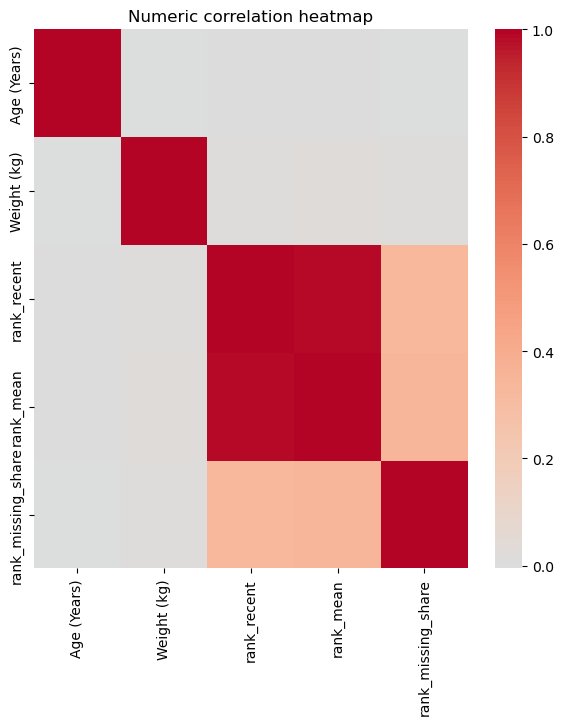

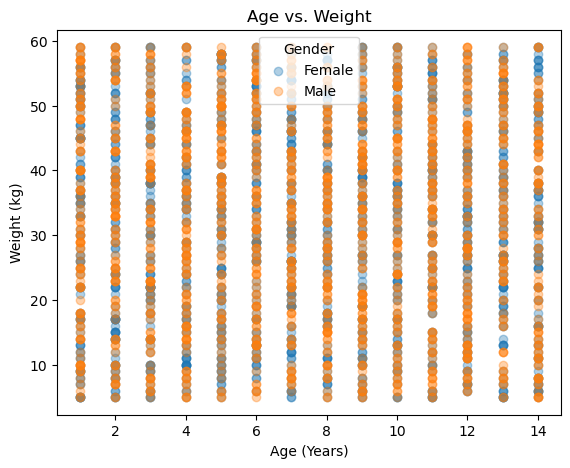

In [10]:
# Correlation heatmap across all numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(min(12, 0.6*len(numeric_cols) + 4), min(10, 0.6*len(numeric_cols) + 4)))
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, square=False)
    plt.title("Numeric correlation heatmap")
    plt.show()
else:
    print("Not enough numeric columns to compute correlation heatmap.")

# Scatter plot Age vs Weight (colored by Gender if present)
age_col = "Age (Years)" if "Age (Years)" in df.columns else None
wt_col = "Weight (kg)" if "Weight (kg)" in df.columns else None

if age_col and wt_col:
    plt.figure(figsize=(6.5,5))
    if "Gender" in df.columns:
        for g, sub in df.groupby("Gender"):
            plt.scatter(sub[age_col], sub[wt_col], alpha=0.35, label=str(g))
        plt.legend(title="Gender")
    else:
        plt.scatter(df[age_col], df[wt_col], alpha=0.35, color="tab:blue")
    plt.xlabel(age_col)
    plt.ylabel(wt_col)
    plt.title("Age vs. Weight")
    plt.show()
else:
    print("Skipping scatter: required columns not found among ['Age (Years)', 'Weight (kg)'].")

## Step 5: Breed-level aggregation — distribution by breed

What we do:
- Group by Breed and calculate count, mean, std, min, and max for Weight (kg)
- Sort by frequency to highlight the most represented breeds
- Use as a sanity check for extremes and sampling imbalance

Outputs:
- Table of per-breed statistics (top rows displayed)

In [11]:
# Breed-level aggregation with guards
breed_col = "Breed" if "Breed" in df.columns else None
weight_candidates = ["Weight (kg)", "Weight (Kg)", "Weight"]
weight_col = next((c for c in weight_candidates if c in df.columns), None)

if not breed_col:
    print("Column 'Breed' not found; skipping breed-level aggregation.")
else:
    if weight_col:
        grp = df.groupby(breed_col)[weight_col].agg(["count", "mean", "std", "min", "max"]).sort_values("count", ascending=False)
        print(f"Per-breed stats for {weight_col} — top 20 shown (total breeds: {grp.shape[0]}):")
        display(grp.head(20))
    else:
        # Fallback: just show counts per breed
        counts = df[breed_col].value_counts()
        print("Weight column not found; showing breed counts only — top 20:")
        display(counts.head(20).to_frame("count"))

Per-breed stats for Weight (kg) — top 20 shown (total breeds: 53):


,count,mean,std,min,max
Breed,,,,,
Rottweiler,118,30.728814,15.845224,5,59
French Bulldog,70,28.957143,15.170944,5,58
Pekingese,68,33.308824,16.229012,5,59
Pembroke Welsh Corgi,67,34.477612,14.676675,8,59
Doberman Pinscher,66,30.075758,16.585731,5,59
Weimaraner,66,29.863636,14.363293,5,59
Pug,65,33.600000,17.300470,5,58
Cavalier King Charles Spaniel,64,30.234375,15.476292,6,59
Chinese Shar-Pei,64,38.234375,14.039335,6,58


## Step 6: Inspect breed_traits_long and pivot — wide trait table

What we do:
- Inspect sample rows and columns to confirm the long-format schema
- If schema is (Breed, Trait, Value), pivot to a wide trait table per Breed
- Otherwise, preview unique values to guide mapping and renaming

Outputs:
- Head of the long-format table
- Head of the pivoted wide table (if created), or schema notes to inform next steps

In [12]:
# Inspect long-format trait table and pivot to wide if possible
pivot = None  # ensure variable exists for later merge step

print("breed_traits_long: sample rows")
display(breed_traits_long.head(30))
print("columns:", breed_traits_long.columns.tolist())

required_cols = {"Breed", "Trait", "Value"}
if required_cols.issubset(set(breed_traits_long.columns)):
    try:
        pivot = breed_traits_long.pivot_table(index="Breed", columns="Trait", values="Value", aggfunc="first")
        print("Pivoted trait table shape:", pivot.shape)
        display(pivot.head(10))
    except Exception as e:
        print("Pivot failed:", e)
        # optional: inspect unique samples to guide fixes
        for col in ["Breed", "Trait", "Value"]:
            uniq = breed_traits_long[col].dropna().unique()[:10]
            print(f"{col} unique sample:", uniq)
else:
    print("Expected columns not found for pivot. Showing unique samples per column (up to 10 each):")
    for col in breed_traits_long.columns:
        uniq = breed_traits_long[col].dropna().unique()[:10]
        print(f"{col} unique sample:", uniq)

breed_traits_long: sample rows


,Breed,Trait,Trait_Score
0,Retrievers (Labrador),Affectionate With Family,5
1,Retrievers (Labrador),Good With Young Children,5
2,Retrievers (Labrador),Good With Other Dogs,5
3,Retrievers (Labrador),Shedding Level,4
4,Retrievers (Labrador),Coat Grooming Frequency,2
5,Retrievers (Labrador),Drooling Level,2
6,Retrievers (Labrador),Coat Type,Double
7,Retrievers (Labrador),Coat Length,Short
8,Retrievers (Labrador),Openness To Strangers,5
9,Retrievers (Labrador),Playfulness Level,5


columns: ['Breed', 'Trait', 'Trait_Score']
Expected columns not found for pivot. Showing unique samples per column (up to 10 each):
Breed unique sample: ['Retrievers\xa0(Labrador)' 'French\xa0Bulldogs'
 'German\xa0Shepherd\xa0Dogs' 'Retrievers\xa0(Golden)' 'Bulldogs'
 'Poodles' 'Beagles' 'Rottweilers' 'Pointers\xa0(German\xa0Shorthaired)'
 'Dachshunds']
Trait unique sample: ['Affectionate With Family' 'Good With Young Children'
 'Good With Other Dogs' 'Shedding Level' 'Coat Grooming Frequency'
 'Drooling Level' 'Coat Type' 'Coat Length' 'Openness To Strangers'
 'Playfulness Level']
Trait_Score unique sample: ['5' '4' '2' 'Double' 'Short' '3' '1' 'Smooth' 'Medium' 'Curly']


## Step 7: Merge trait features into main dataset

What we do:
- Left-join pivoted breed-level traits into the main df on Breed
- Preserve the original row count; report merged shape
- Note missing trait rows; consider imputation or flags in later steps

Outputs:
- Merged dataset shape and preview

In [13]:
# Merge pivoted breed traits into main dataset
try:
    if 'pivot' not in locals() or pivot is None:
        raise ValueError("Pivot table not available. Run the previous cell to create 'pivot'.")

    # Ensure join key exists
    if "Breed" not in df.columns:
        raise KeyError("'Breed' column not found in main dataset; cannot merge.")

    # If pivot index is Breed, reset for merge
    if pivot.index.name == "Breed":
        right = pivot.reset_index()
    else:
        right = pivot.copy()
        if "Breed" not in right.columns:
            raise KeyError("'Breed' not found as index or column in pivot table.")

    pre_rows, pre_cols = df.shape
    merged = df.merge(right, on="Breed", how="left", suffixes=("", "_trait"))
    post_rows, post_cols = merged.shape

    print(f"Merged shape: {pre_rows}x{pre_cols} -> {post_rows}x{post_cols}")
    if post_rows != pre_rows:
        print("Warning: row count changed after left-join (unexpected). Check keys and duplicates.")

    # Report how many trait columns were added and missingness among them
    added_cols = [c for c in merged.columns if c not in df.columns]
    print(f"Trait columns added: {len(added_cols)}")
    if added_cols:
        miss_perc = (merged[added_cols].isnull().all(axis=1).mean() * 100).round(2)
        print(f"Rows with all trait columns missing: {miss_perc}%")

    display(merged.head())

    # Persist back to df for downstream steps
    df = merged
except Exception as e:
    print("Pivot or merge not ready:", e)

Pivot or merge not ready: Pivot table not available. Run the previous cell to create 'pivot'.


## Step 8: Feature engineering — encodings and bins

What we do:
- Encode Gender to binary (Male=0, Female=1) if present
- Derive size_class from Weight (kg): toy/small/medium/large/giant
- Create age_bin from Age (Years): puppy/adult/senior
- Display a preview of engineered columns to verify

Outputs:
- DataFrame preview including engineered columns

In [14]:
# Feature engineering with guards and safe mappings

# 1) Gender binary encoding (Male=0, Female=1) if present
if "Gender" in df.columns:
    # normalize case for mapping, keep original values if others exist
    def map_gender(x):
        if isinstance(x, str):
            xl = x.strip().lower()
            if xl == "male":
                return 0
            if xl == "female":
                return 1
        return pd.NA
    df["Gender_bin"] = df["Gender"].apply(map_gender)
else:
    print("'Gender' column not found; skipping gender encoding.")

# 2) size_class from weight (toy/small/medium/large/giant)
weight_candidates = ["Weight (kg)", "Weight (Kg)", "Weight"]
weight_col = next((c for c in weight_candidates if c in df.columns), None)

def size_class(w):
    try:
        if pd.isna(w):
            return pd.NA
        if w < 4.5: return "toy"
        if w < 11: return "small"
        if w < 25: return "medium"
        if w < 45: return "large"
        return "giant"
    except Exception:
        return pd.NA

if weight_col:
    df["size_class"] = df[weight_col].apply(size_class)
else:
    print("Weight column not found; skipping size_class feature.")

# 3) age bins
age_candidates = ["Age (Years)", "Age (years)", "Age"]
age_col = next((c for c in age_candidates if c in df.columns), None)
if age_col:
    try:
        df["age_bin"] = pd.cut(df[age_col], bins=[0, 1, 7, float("inf")], labels=["puppy", "adult", "senior"], include_lowest=True)
    except Exception as e:
        print("Age binning failed:", e)
else:
    print("Age column not found; skipping age_bin feature.")

# Preview engineered columns if present
preview_cols = [c for c in [age_col, weight_col, "size_class", "age_bin", "Gender", "Gender_bin"] if c and c in df.columns]
if preview_cols:
    display(df[preview_cols].head())
else:
    print("No engineered columns to preview.")

,Age (Years),Weight (kg),size_class,age_bin,Gender,Gender_bin
0,13,35,large,senior,Male,0
1,10,43,large,senior,Female,1
2,2,16,medium,adult,Female,1
3,9,57,giant,senior,Male,0
4,12,39,large,senior,Male,0


## Step 9: Export processed dataset — save for downstream modeling

What we do:
- Save the enriched dataset (EDA outputs and engineered features) to CSV
- Ensure no index column is written

Outputs:
- File saved: `dogs_dataset_EDA.csv` at repository root

## Step 10: EDA summary — key findings and next actions
What we do:
- Summarize dataset sizes, missingness hot spots, and merge coverage.
- Highlight unmatched breeds and columns with notable missingness.
- Propose concrete clean-up actions for modeling readiness.

Outputs:
- Printed summary with key metrics and a short action list

In [15]:
# Auto-generated EDA summary
import pandas as pd
def pct(x):
    return f"{x*100:.2f}%"

summary_lines = []
summary_lines.append(f"Main dataset shape: {df.shape}")

# Overall missing in df
total_missing = int(df.isnull().sum().sum())
summary_lines.append(f"Total missing cells in df: {total_missing}")

# Rank coverage if available
if "rank_recent" in df.columns:
    rank_cov = df["rank_recent"].notnull().mean()
    unmatched_n = int(df["rank_recent"].isnull().sum())
    summary_lines.append(f"Rank coverage in df: {pct(rank_cov)} (unmatched rows: {unmatched_n})")

# Breed traits duplicate check
if "Breed" in breed_traits.columns:
    dups_bt = int(breed_traits["Breed"].duplicated().sum())
    summary_lines.append(f"Duplicate Breed rows in breed_traits: {dups_bt}")

# Hot-spot missing in breed_rank
rank_cols = [c for c in breed_rank.columns if isinstance(c, str) and c.endswith(" Rank") and c.split()[0].isdigit()]
if rank_cols:
    miss_counts = breed_rank[rank_cols].isnull().sum().sort_values(ascending=False)
    top_miss = miss_counts[miss_counts>0].head(5)
    if not top_miss.empty:
        summary_lines.append("Top missing rank columns:")
        for k,v in top_miss.items():
            summary_lines.append(f"- {k}: {v} missing")

print("\n".join(summary_lines))

print("\nNext actions:")
print("- Consider a manual mapping for the few unmatched breeds to reach ~100% rank coverage.")
print("- If needed, impute missing AKC rank using mean rank by similar breed groups or external lookup.")
print("- Review trait pivot columns and impute or flag any that remain sparse after merge.")

Main dataset shape: (3000, 12)
Total missing cells in df: 633
Rank coverage in df: 92.97% (unmatched rows: 211)
Duplicate Breed rows in breed_traits: 0
Top missing rank columns:
- 2019 Rank: 20 missing
- 2013 Rank: 19 missing
- 2014 Rank: 19 missing
- 2015 Rank: 19 missing
- 2016 Rank: 19 missing

Next actions:
- Consider a manual mapping for the few unmatched breeds to reach ~100% rank coverage.
- If needed, impute missing AKC rank using mean rank by similar breed groups or external lookup.
- Review trait pivot columns and impute or flag any that remain sparse after merge.


In [16]:
# Export processed dataset for downstream modeling
out_path = "dogs_dataset_EDA.csv"
try:
    df.to_csv(out_path, index=False)
    print(f"Saved {out_path} — shape: {df.shape}")
except Exception as e:
    print("Failed to save processed dataset:", e)

Saved dogs_dataset_EDA.csv — shape: (3000, 12)


# Kedar Cross Validation

## Step 11: Cross-dataset breed coverage and similarity mapping
What we do:
- Extract Stanford Dogs (120 classes) breed names from XML annotations (if the folder exists).
- Normalize names with the same token-based key we used elsewhere (`breed_key`).
- Compute coverage: how many Kaggle breeds (in this repo) are directly included in the 120 Stanford classes.
- For unmatched Kaggle breeds, compute token Jaccard similarity to suggest the top-3 "alike" Stanford breeds to condense or map to.

Outputs:
- Coverage counts and percentage
- Sample of unmatched Kaggle breeds
- Suggested mapping table (top-3 similar Stanford breeds per unmatched)

In [17]:
# Build Stanford 120-class breed list and compute coverage + similarity mapping
import os, glob, re, xml.etree.ElementTree as ET
import pandas as pd
from collections import Counter

def breed_key(s):
    if not isinstance(s, str):
        return None
    s = s.lower()
    s = re.sub(r"[()\-/&,]", " ", s)
    s = re.sub(r"[^a-z\s]", "", s)
    tokens = [t for t in s.split() if t not in {"dog", "dogs"}]
    def singularize(t):
        if t.endswith("ies"):
            return t[:-3] + "y"
        if t.endswith("s") and not t.endswith("ss"):
            return t[:-1]
        return t
    tokens = [singularize(t) for t in tokens]
    tokens = sorted(set(tokens))
    return " ".join(tokens)

def token_set(s):
    if not isinstance(s, str):
        return set()
    return set(s.split())

def jaccard(a, b):
    A, B = token_set(a), token_set(b)
    if not A or not B:
        return 0.0
    return len(A & B) / len(A | B)

def extract_stanford_breeds(stanford_root="StanfordDogs/annotations"):
    if not os.path.isdir(stanford_root):
        print(f"Stanford annotations folder not found at: {stanford_root}")
        return pd.DataFrame(columns=["Breed"])
    breeds = []
    files = glob.glob(os.path.join(stanford_root, "**", "*.xml"), recursive=True)
    if not files:
        print("No XML files found under Stanford annotations; check path.")
        return pd.DataFrame(columns=["Breed"])
    for xml_file in files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
            breed = root.find(".//object/name").text
            breeds.append(breed)
        except Exception:
            continue
    dfb = pd.DataFrame(sorted(set(breeds)), columns=["Breed"])
    dfb["breed_key"] = dfb["Breed"].apply(breed_key)
    return dfb

# 1) Stanford list
stanford_df = extract_stanford_breeds()
if stanford_df.empty:
    print("Stanford 120-class list unavailable; skipping coverage computation. Place annotations under 'StanfordDogs/annotations'.")
else:
    # 2) Kaggle list from our main df
    if "breed_key" not in df.columns:
        if "Breed" in df.columns:
            df["breed_key"] = df["Breed"].apply(breed_key)
        else:
            raise KeyError("'Breed' not found in df.")
    kaggle_keys = set(df["breed_key"].dropna().unique())
    stanford_keys = set(stanford_df["breed_key"].dropna().unique())

    overlap = kaggle_keys & stanford_keys
    missing = kaggle_keys - stanford_keys

    print(f"Kaggle breeds: {len(kaggle_keys)}")
    print(f"Stanford classes: {len(stanford_keys)}")
    if len(kaggle_keys):
        print(f"Coverage (Kaggle in Stanford): {len(overlap)} / {len(kaggle_keys)} = {len(overlap)/len(kaggle_keys)*100:.2f}%")

    # 3) Suggest top-3 similar Stanford breeds for unmatched Kaggle keys using Jaccard
    def top_similar(target_key, candidates, topn=3):
        sims = [(cand, jaccard(target_key, cand)) for cand in candidates]
        sims.sort(key=lambda x: x[1], reverse=True)
        return [(k, round(s, 3)) for k, s in sims[:topn]]

    suggestions = []
    for mk in sorted(list(missing))[:1000]:  # limit for display
        sims = top_similar(mk, stanford_keys, topn=3)
        suggestions.append({"kaggle_key": mk, "suggestions": sims})

    print("\nSample suggestions for unmatched Kaggle breeds (first 20):")
    for row in suggestions[:20]:
        print("-", row["kaggle_key"], "->", row["suggestions"])

    # Optional: build a condensed mapping to the best match above a threshold
    THRESH = 0.5
    condensed_map = {row["kaggle_key"]: row["suggestions"][0][0] for row in suggestions if row["suggestions"] and row["suggestions"][0][1] >= THRESH}
    print(f"\nAuto-condensed mappings (Jaccard >= {THRESH}): {len(condensed_map)} candidates")

    # If desired, apply condensed mapping to create a consolidated label column
    df["breed_key_condensed"] = df["breed_key"].map(condensed_map).fillna(df["breed_key"])
    print("Added 'breed_key_condensed' to df (uses condensed mapping when high similarity found).")

No XML files found under Stanford annotations; check path.
Stanford 120-class list unavailable; skipping coverage computation. Place annotations under 'StanfordDogs/annotations'.


In [23]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import re
from pathlib import Path

# Cell A — Extract breed names from Stanford Dogs XML annotation files (robust)
stanford_root = "StanfordDogs/annotations"
print("Looking in:", stanford_root)

def extract_name_from_text(text):
    m = re.search(r"<name>(.*?)</name>", text, flags=re.IGNORECASE | re.DOTALL)
    return m.group(1).strip() if m else None

breed_names = []
files_checked = 0
if os.path.isdir(stanford_root):
    for filepath in glob.glob(os.path.join(stanford_root, "**", "*"), recursive=True):
        if os.path.isdir(filepath):
            continue
        files_checked += 1
        name = None
        # 1) Try XML parse
        try:
            tree = ET.parse(filepath)
            root = tree.getroot()
            obj_name = root.find(".//object/name")
            if obj_name is not None and obj_name.text:
                name = obj_name.text.strip()
        except Exception:
            # 2) Fallback: regex search for <name> tag
            try:
                with open(filepath, "r", encoding="utf8", errors="ignore") as f:
                    txt = f.read(4000)
                    name = extract_name_from_text(txt)
            except Exception:
                pass
        # 3) Fallback: infer from parent directory
        if not name:
            parent = Path(filepath).parent.name
            cand = parent.split("-", 1)[1] if "-" in parent else parent
            name = cand.replace("_", " ").strip()
        if name:
            breed_names.append(name)
    print(f"Files scanned: {files_checked}")
else:
    print(f"Stanford annotations folder not found at: {stanford_root}")

# Normalize and build DataFrame
stanford_breeds_list = sorted(set([b.lower().strip() for b in breed_names if b]))
stanford_df = pd.DataFrame(stanford_breeds_list, columns=["Breed_clean"])
print("Total breeds detected in Stanford dataset:", len(stanford_df))
display(stanford_df.head(30))

# Cell B — Compare Breed Coverage (simple lowercase match for quick sanity)
df = pd.read_csv("dogs_dataset.csv")

df["Breed_clean"] = df["Breed"].astype(str).str.lower().str.strip()

overlap = set(df["Breed_clean"]).intersection(set(stanford_df["Breed_clean"])) if not stanford_df.empty else set()
missing = set(df["Breed_clean"]) - overlap

print("Breeds in Cooldawgs dataset:", df["Breed_clean"].nunique())
print("Breeds supported by Stanford EfficientNet model:", len(stanford_df))
print("✅ Direct overlaps:", len(overlap))
print("⚠️ Breeds NOT recognized by classifier:", len(missing))

display(pd.DataFrame({"Missing_Breeds": sorted(list(missing))}).head(10))

# Cell C — Group missing breeds using breed_traits dataset (guarded pivot)
breed_traits_long = pd.read_csv("breed_traits_long.csv")
print("breed_traits_long columns:", breed_traits_long.columns.tolist())

# Normalize any non-breaking spaces in breed names
if "Breed" in breed_traits_long.columns:
    breed_traits_long["Breed"] = breed_traits_long["Breed"].astype(str).str.replace("\u00A0", " ", regex=False).str.strip()

# Determine columns flexibly
breed_col = "Breed" if "Breed" in breed_traits_long.columns else None
trait_col = "Trait" if "Trait" in breed_traits_long.columns else None
value_col = None
for cand in ["Trait_Score", "Value", "value", "Score", "score", "Rating", "rating"]:
    if cand in breed_traits_long.columns:
        value_col = cand
        break

traits = None
if all([breed_col, trait_col, value_col]):
    try:
        traits = breed_traits_long.pivot_table(
            index=breed_col,
            columns=trait_col,
            values=value_col,
            aggfunc="first"
        )
        print("Pivoted trait table shape:", traits.shape)
        display(traits.head())
    except Exception as e:
        print("Pivot failed:", e)
else:
    print("Skipping pivot: required columns not found (need Breed, Trait, and a value column like Trait_Score or Value).")

# Cell D — Similarity (only if we have numeric traits and sklearn available)
try:
    from sklearn.metrics.pairwise import cosine_similarity
    SKLEARN_OK = True
except Exception:
    print("sklearn not available; skipping cosine similarity.")
    SKLEARN_OK = False

if SKLEARN_OK and traits is not None and not traits.empty:
    # Keep only numeric values for similarity
    trait_num = traits.apply(pd.to_numeric, errors="coerce")
    # Drop columns and rows that are entirely NaN after coercion
    trait_num = trait_num.dropna(axis=1, how="all").dropna(axis=0, how="all")

    if trait_num.shape[0] >= 2 and trait_num.shape[1] >= 1:
        try:
            trait_sim = cosine_similarity(trait_num.fillna(0))
            sim_df = pd.DataFrame(trait_sim, index=trait_num.index, columns=trait_num.index)

            # Map cleaned names to canonical trait index names
            idx_map = {str(b).lower().strip(): b for b in trait_num.index}

            def top_match(clean_breed_key, k=3):
                canon = idx_map.get(clean_breed_key)
                if canon is None or canon not in sim_df.columns:
                    return None
                return sim_df[canon].sort_values(ascending=False).head(k)

            print("\nClosest trait-based matches for a few missing breeds (up to 5):")
            shown = 0
            for missing_breed in sorted(list(missing)):
                if shown >= 5:
                    break
                tm = top_match(missing_breed)
                if tm is not None:
                    print("\nMissing breed:", missing_breed)
                    display(tm)
                    shown += 1
            if shown == 0:
                print("No missing breeds found in trait matrix index; trait names may not align with df breed names.")
        except Exception as e:
            print("Similarity computation skipped due to error:", e)
    else:
        print("Trait matrix insufficient for similarity (need >=2 breeds and >=1 numeric trait).")
else:
    if traits is None or traits.empty:
        print("Skipping similarity: no traits available after pivot.")

# Simple feature proxies (kept for continuity; duplicates are harmless)
df["Gender_num"] = df.get("Gender", pd.Series(index=df.index)).map({"Male": 0, "Female": 1})

if "Weight (kg)" in df.columns:
    df["size_class"] = pd.cut(
        df["Weight (kg)"],
        bins=[0, 4.5, 11, 25, 45, 200],
        labels=["Toy", "Small", "Medium", "Large", "Giant"]
    )

for col in ["Acclimatization_Days", "PriorHeatInjury", "PercentDogsHeatInjury", "Height_cm", "TimeOfDay"]:
    if col not in df.columns:
        df[col] = None

display(df.head())

Looking in: StanfordDogs/annotations
Files scanned: 20580
Total breeds detected in Stanford dataset: 120
Files scanned: 20580
Total breeds detected in Stanford dataset: 120


,Breed_clean
0,affenpinscher
1,afghan_hound
2,african_hunting_dog
3,airedale
4,american_staffordshire_terrier
5,appenzeller
6,australian_terrier
7,basenji
8,basset
9,beagle


Breeds in Cooldawgs dataset: 53
Breeds supported by Stanford EfficientNet model: 120
✅ Direct overlaps: 13
⚠️ Breeds NOT recognized by classifier: 40


,Missing_Breeds
0,airedale terrier
1,akita
2,alaskan malamute
3,australian shepherd
4,belgian malinois
5,bernese mountain dog
6,bichon frise
7,border collie
8,boston terrier
9,bull terrier


breed_traits_long columns: ['Breed', 'Trait', 'Trait_Score']
Pivoted trait table shape: (195, 16)


Trait,Adaptability Level,Affectionate With Family,Barking Level,Coat Grooming Frequency,Coat Length,Coat Type,Drooling Level,Energy Level,Good With Other Dogs,Good With Young Children,Mental Stimulation Needs,Openness To Strangers,Playfulness Level,Shedding Level,Trainability Level,Watchdog/Protective Nature
Breed,,,,,,,,,,,,,,,,
Affenpinschers,4,3,3,3,Short,Wiry,1,3,3,3,3,5,3,3,3,3
Afghan Hounds,3,3,3,4,Long,Silky,1,4,3,3,3,3,3,1,1,3
Airedale Terriers,3,3,3,3,Short,Wiry,1,3,3,3,3,3,3,1,3,5
Akitas,3,3,2,3,Medium,Double,1,4,1,3,3,2,3,3,3,5
Alaskan Malamutes,3,3,3,3,Medium,Double,1,4,3,3,3,3,3,3,5,4



Closest trait-based matches for a few missing breeds (up to 5):

Missing breed: belgian malinois


Breed
Belgian Malinois     1.0
Belgian Sheepdogs    1.0
Belgian Tervuren     1.0
Name: Belgian Malinois, dtype: float64


Missing breed: chinese shar-pei


Breed
Chinese Shar-Pei    1.000000
Great Danes         0.991525
Great Pyrenees      0.987437
Name: Chinese Shar-Pei, dtype: float64


Missing breed: havanese


Breed
Havanese           1.000000
Border Terriers    0.987784
Keeshonden         0.986236
Name: Havanese, dtype: float64


Missing breed: maltese


Breed
Maltese        1.000000
Lhasa Apsos    0.990809
Pomeranians    0.989949
Name: Maltese, dtype: float64


Missing breed: pekingese


Breed
Pekingese                 1.000000
Glen of Imaal Terriers    0.983259
Irish Wolfhounds          0.979592
Name: Pekingese, dtype: float64

,Breed,Age (Years),Weight (kg),Color,Gender,Breed_clean,Gender_num,size_class,Acclimatization_Days,PriorHeatInjury,PercentDogsHeatInjury,Height_cm,TimeOfDay
0,Airedale Terrier,13,35,White,Male,airedale terrier,0,Large,None,None,None,None,None
1,Jack Russell Terrier,10,43,Tan,Female,jack russell terrier,1,Large,None,None,None,None,None
2,Dogo Argentino,2,16,Spotted,Female,dogo argentino,1,Medium,None,None,None,None,None
3,Labrador Retriever,9,57,Bicolor,Male,labrador retriever,0,Giant,None,None,None,None,None
4,French Bulldog,12,39,Spotted,Male,french bulldog,0,Large,None,None,None,None,None


# Lit Review Cutoffs Comparison (Not Finished)